# Method defs

Esta tabla contiene la información de las funciones definidas dentro de una clase (métodos). Cada entrada en esta tabla tiene una entrada en la tabla functiondef con el resto de información.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = get_data('methoddefs')

# Table name, features and target.
TABLE_NAME = 'methoddefs'
TABLE_FEATURES = ['methoddef__is_class_method', 'methoddef__is_static_method', 'methoddef__is_constructor_method', 'methoddef__is_abstract_method', 'methoddef__is_property', 'methoddef__is_wrapper', 'methoddef__is_cached', 'methoddef__expertise_level', 'functiondef__name_convention', 'functiondef__number_of_characters', 'functiondef__is_magic', 'functiondef__is_private', 'functiondef__body_count', 'functiondef__expressions_pct', 'functiondef__is_async', 'functiondef__number_of_decorators', 'functiondef__has_return_type_annotation', 'functiondef__has_doc_string', 'functiondef__height', 'functiondef__type_annotations_pct']
TABLE_TARGET = 'methoddef__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2024-05-22 18:14:23.942805 Data cache files found ...
2024-05-22 18:14:23.965366 Data cache files successfully loaded!!
Features shape: (92324, 20)
Target shape: (92324,)
As we can see the downloaded data contains a total of 92324 instances. Each of the instances corresponds to a program. For each program we have 20 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92324 entries, 0 to 92323
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   methoddef__is_class_method               92324 non-null  bool   
 1   methoddef__is_static_method              92324 non-null  bool   
 2   methoddef__is_constructor_method         92324 non-null  bool   
 3   methoddef__is_abstract_method            92324 non-null  bool   
 4   methoddef__is_property                   92324 non-null  bool   
 5   methoddef__is_wrapper                    92324 non-null  bool   
 6   methoddef__is_cached                     92324 non-null  bool   
 7   methoddef__expertise_level               92324 non-null  object 
 8   functiondef__name_convention             92324 non-null  object 
 9   functiondef__number_of_characters        92324 non-null  int64  
 10  functiondef__is_magic                    92324

Cómo podemos ver la tabla está compuesta por 12 variables boleanas, 6 numéricas y 2 de tipo objeto.

### 2.1 - Balance de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 38.63% instances for BEGINNER class and 61.37% for EXPERT class.


### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES + [TABLE_TARGET]))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [76.36%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

methoddef__is_class_method                 0
methoddef__is_static_method                0
methoddef__is_constructor_method           0
methoddef__is_abstract_method              0
methoddef__is_property                     0
methoddef__is_wrapper                      0
methoddef__is_cached                       0
methoddef__expertise_level                 0
functiondef__name_convention               0
functiondef__number_of_characters          0
functiondef__is_magic                      0
functiondef__is_private                    0
functiondef__body_count                    0
functiondef__expressions_pct               0
functiondef__is_async                      0
functiondef__number_of_decorators          0
functiondef__has_return_type_annotation    0
functiondef__has_doc_string                0
functiondef__height                        0
functiondef__type_annotations_pct          0
dtype: int64

In [6]:
print_empty_cols(X)

methoddef__is_class_method
--------------------------
0 instancias no tienen un valor para la columna methoddef__is_class_method


methoddef__is_static_method
---------------------------
0 instancias no tienen un valor para la columna methoddef__is_static_method


methoddef__is_constructor_method
--------------------------------
0 instancias no tienen un valor para la columna methoddef__is_constructor_method


methoddef__is_abstract_method
-----------------------------
0 instancias no tienen un valor para la columna methoddef__is_abstract_method


methoddef__is_property
----------------------
0 instancias no tienen un valor para la columna methoddef__is_property


methoddef__is_wrapper
---------------------
0 instancias no tienen un valor para la columna methoddef__is_wrapper


methoddef__is_cached
--------------------
0 instancias no tienen un valor para la columna methoddef__is_cached


methoddef__expertise_level
--------------------------
0 instancias no tienen un valor para la colu

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
methoddef__is_class_method,92324,2,False,89407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_static_method,92324,2,False,90457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_constructor_method,92324,2,False,81042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_abstract_method,92324,2,False,91486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_property,92324,2,False,86559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_wrapper,92324,1,False,92324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_cached,92324,1,False,92324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__expertise_level,92324,2,EXPERT,56658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__name_convention,92324,7,SnakeCase,66410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_characters,92324.0,NaN,NaN,NaN,12.436593,7.492179,1.0,8.0,10.0,16.0,74.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "functiondef__expressions_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, inf)], # min: 0 ; max: 1
    "functiondef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 7
    "functiondef__type_annotations_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, inf)], # min: 0 ; max: 1
    "functiondef__number_of_characters": [(1.0, 8.0), (8.0, 10), (10, 16), (16, inf)], # min: 1 ; max: 74
    "functiondef__body_count": [(0.0, 1.0), (1.0, 2.0), (2.0, 2.0), (2.0, inf)], # min: 1 ; max: 364
    "functiondef__height": [(0.0, 2.0), (2.0, inf)], # min: 2 ; max: 7
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['methoddef__is_class_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_static_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_constructor_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_abstract_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_property'], 10))
print(get_statistics(X_copy, ['methoddef__is_wrapper'], 10))
print(get_statistics(X_copy, ['methoddef__is_cached'], 10))
print(get_statistics(X_copy, ['functiondef__expressions_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['functiondef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_characters'], 10))
print(get_statistics(X_copy, ['functiondef__body_count'], 10))
print(get_statistics(X_copy, ['functiondef__height'], 10))
print(get_statistics(full_table, ['functiondef__name_convention'], 10))
print(get_statistics(X_copy, ['functiondef__is_private'], 10))
print(get_statistics(X_copy, ['functiondef__is_magic'], 10))
print(get_statistics(X_copy, ['functiondef__is_async'], 10))
print(get_statistics(X_copy, ['functiondef__has_return_type_annotation'], 10))
print(get_statistics(X_copy, ['functiondef__has_doc_string'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
 methoddef__is_class_method  count  percentage
                      False  89407   96.840475
                       True   2917    3.159525

 methoddef__is_static_method  count  percentage
                       False  90457   97.977774
                        True   1867    2.022226

 methoddef__is_constructor_method  count  percentage
                            False  81042   87.779992
                             True  11282   12.220008

 methoddef__is_abstract_method  count  percentage
                         False  91486   99.092327
                          True    838    0.907673

 methoddef__is_property  count  percentage
                  False  86559   93.755686
                   True   5765    6.244314

 methoddef__is_wrapper  count  percentage
                 False  92324       100.0

 methoddef__is_cached  count  percentage
                False  92324       100.0

functiondef__expressions_pct  count  percentage
                   [0.0_0.0]  448

In [9]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (92324, 27)
Target shape: (92324,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

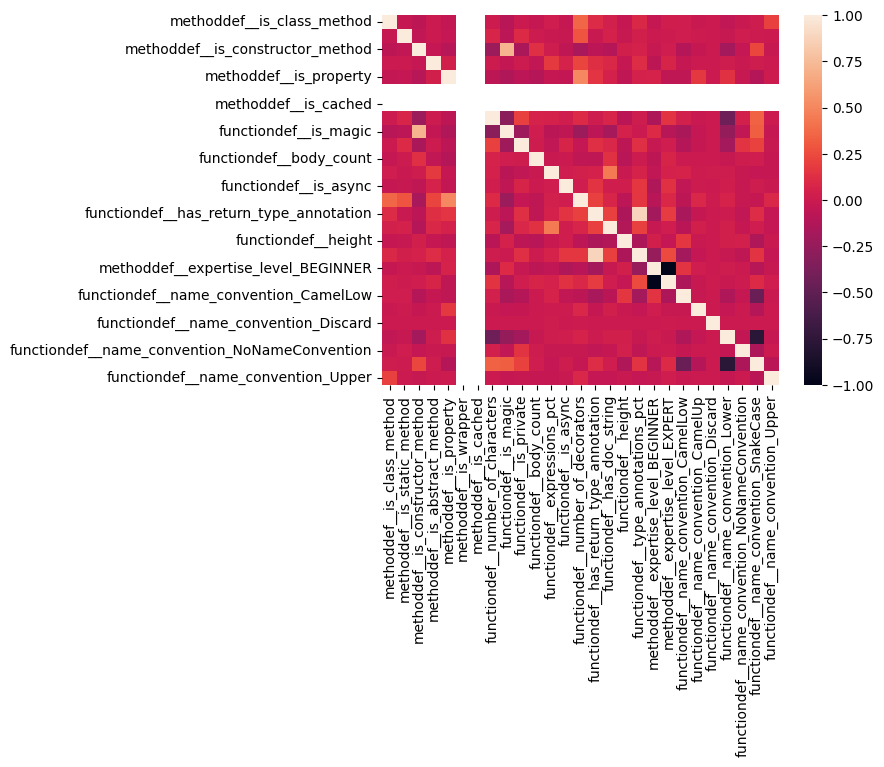

In [10]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 19 variable (12 booleanas, 4 numericas, 2 porcentuales y 1 categorica) se hara un analisis detallado

### Variable is_class_method (1/19)
Esta variable es de tipo booleano y representa si el método es de clase.

<Axes: xlabel='methoddef__is_class_method', ylabel='Count'>

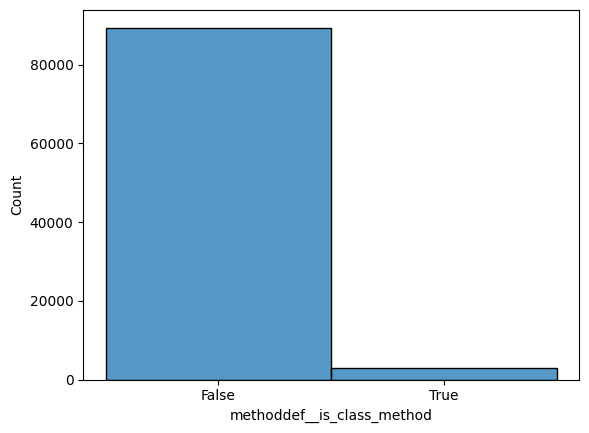

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_class_method'], discrete=True)

In [12]:
num_true_values = len(X[X['methoddef__is_class_method'] == True])
num_false_values = len(X[X['methoddef__is_class_method'] == False])
std = X['methoddef__is_class_method'].std()
freq_true = len(X[X['methoddef__is_class_method'] == True]) / len(X['methoddef__is_class_method'])
freq_false = len(X[X['methoddef__is_class_method'] == False]) / len(X['methoddef__is_class_method'])
print(f'La variable is_class_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_class_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_class_method a False es {freq_false}.')

La variable is_class_method contiene 2917 valores verdaderos y 89407 valores falsos. Y, la desviación típica es de 0.17492090165615082
La frecuencia con la que programa puede tener la variable is_class_method a True es 0.03159525150556735.
La frecuencia con la que programa puede tener la variable is_class_method a False es 0.9684047484944327.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_class_method', possible_values)

La variable methoddef__is_class_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_class_method toma el valor de 0.0 en un 96.84% de los items.
La variable methoddef__is_class_method toma el valor de 1.0 en un 3.16% de los items.


In [14]:
X[X['methoddef__is_class_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,2917.0,2917.0,2917.0,2917.000000,2917.0,2917.0,2917.0,2917.000000,2917.000000,2917.000000,...,2917.000000,2917.000000,2917.000000,2917.000000,2917.0,2917.0,2917.000000,2917.000000,2917.000000,2917.000000
mean,1.0,0.0,0.0,0.005142,0.0,0.0,0.0,12.463833,0.008570,0.132671,...,0.380227,0.310250,0.689750,0.098732,0.0,0.0,0.088447,0.000686,0.751800,0.060336
std,0.0,0.0,0.0,0.071537,0.0,0.0,0.0,4.894547,0.092195,0.339277,...,0.338550,0.462675,0.462675,0.298352,0.0,0.0,0.283993,0.026180,0.432043,0.238149
min,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
50%,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,11.000000,0.000000,0.000000,...,0.500000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
75%,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,15.000000,0.000000,0.000000,...,0.666667,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
max,1.0,0.0,0.0,1.000000,0.0,0.0,0.0,41.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


### Variable is_static_method (2/19)
Esta variable es de tipo booleano y representa si el método es estático.

<Axes: xlabel='methoddef__is_static_method', ylabel='Count'>

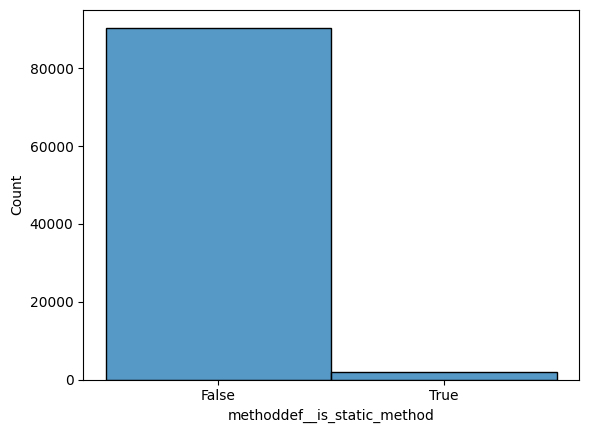

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_static_method'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_static_method'] == True])
num_false_values = len(X[X['methoddef__is_static_method'] == False])
std = X['methoddef__is_static_method'].std()
freq_true = len(X[X['methoddef__is_static_method'] == True]) / len(X['methoddef__is_static_method'])
freq_false = len(X[X['methoddef__is_static_method'] == False]) / len(X['methoddef__is_static_method'])
print(f'La variable is_static_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_static_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_static_method a False es {freq_false}.')

La variable is_static_method contiene 1867 valores verdaderos y 90457 valores falsos. Y, la desviación típica es de 0.14076055586338043
La frecuencia con la que programa puede tener la variable is_static_method a True es 0.020222260733937004.
La frecuencia con la que programa puede tener la variable is_static_method a False es 0.979777739266063.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_static_method', possible_values)

La variable methoddef__is_static_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_static_method toma el valor de 0.0 en un 97.98% de los items.
La variable methoddef__is_static_method toma el valor de 1.0 en un 2.022% de los items.


In [18]:
X[X['methoddef__is_static_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,1867.0,1867.0,1867.0,1867.000000,1867.0,1867.0,1867.0,1867.000000,1867.000000,1867.000000,...,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.0,1867.000000,1867.000000,1867.000000,1867.000000
mean,0.0,1.0,0.0,0.004285,0.0,0.0,0.0,16.287092,0.002142,0.377611,...,0.305625,0.368506,0.631494,0.110873,0.005356,0.0,0.133369,0.021425,0.727906,0.001071
std,0.0,0.0,0.0,0.065337,0.0,0.0,0.0,7.948997,0.046250,0.484919,...,0.449639,0.482529,0.482529,0.314059,0.073009,0.0,0.340064,0.144834,0.445157,0.032721
min,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,11.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,15.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,20.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,61.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable is_constructor_method (3/19)
Esta variable es booleana y representa si el método es un constructor (__ init __).

<Axes: xlabel='methoddef__is_constructor_method', ylabel='Count'>

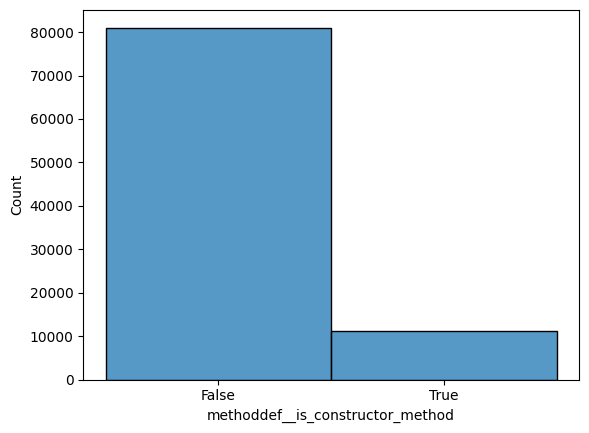

In [19]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_constructor_method'], discrete=True)

In [20]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_constructor_method'] == True])
num_false_values = len(X[X['methoddef__is_constructor_method'] == False])
std = X['methoddef__is_constructor_method'].std()
freq_true = len(X[X['methoddef__is_constructor_method'] == True]) / len(X['methoddef__is_constructor_method'])
freq_false = len(X[X['methoddef__is_constructor_method'] == False]) / len(X['methoddef__is_constructor_method'])
print(f'La variable is_constructor_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_constructor_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_constructor_method a False es {freq_false}.')

La variable is_constructor_method contiene 11282 valores verdaderos y 81042 valores falsos. Y, la desviación típica es de 0.3275185227394104
La frecuencia con la que programa puede tener la variable is_constructor_method a True es 0.12220007798622243.
La frecuencia con la que programa puede tener la variable is_constructor_method a False es 0.8777999220137775.


In [21]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_constructor_method', possible_values)

La variable methoddef__is_constructor_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_constructor_method toma el valor de 0.0 en un 87.78% de los items.
La variable methoddef__is_constructor_method toma el valor de 1.0 en un 12.22% de los items.


In [22]:
X[X['methoddef__is_constructor_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,11282.0,11282.0,11282.0,11282.000000,11282.0,11282.0,11282.0,11282.0,11282.0,11282.0,...,11282.000000,11282.000000,11282.000000,11282.0,11282.0,11282.0,11282.0,11282.0,11282.0,11282.0
mean,0.0,0.0,1.0,0.000620,0.0,0.0,0.0,8.0,1.0,0.0,...,0.266313,0.363145,0.636855,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,0.0,0.0,0.0,0.024902,0.0,0.0,0.0,0.0,0.0,0.0,...,0.356563,0.480927,0.480927,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,0.666667,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Variable is_abstract_method (4/19)
Esta variable es booleana y representa si el método es abstracto.

<Axes: xlabel='methoddef__is_abstract_method', ylabel='Count'>

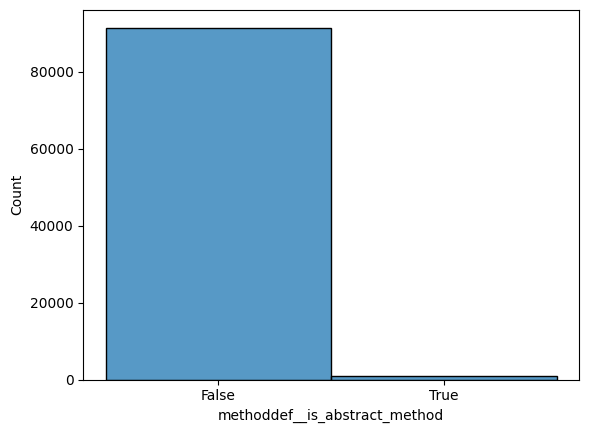

In [23]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_abstract_method'], discrete=True)

In [24]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_abstract_method'] == True])
num_false_values = len(X[X['methoddef__is_abstract_method'] == False])
std = X['methoddef__is_abstract_method'].std()
freq_true = len(X[X['methoddef__is_abstract_method'] == True]) / len(X['methoddef__is_abstract_method'])
freq_false = len(X[X['methoddef__is_abstract_method'] == False]) / len(X['methoddef__is_abstract_method'])
print(f'La variable is_abstract_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_abstract_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_abstract_method a False es {freq_false}.')

La variable is_abstract_method contiene 838 valores verdaderos y 91486 valores falsos. Y, la desviación típica es de 0.09483902156352997
La frecuencia con la que programa puede tener la variable is_abstract_method a True es 0.009076729777739266.
La frecuencia con la que programa puede tener la variable is_abstract_method a False es 0.9909232702222608.


In [25]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_abstract_method', possible_values)

La variable methoddef__is_abstract_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_abstract_method toma el valor de 0.0 en un 99.09% de los items.
La variable methoddef__is_abstract_method toma el valor de 1.0 en un 0.9077% de los items.


In [26]:
X[X['methoddef__is_abstract_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,838.000000,838.000000,838.000000,838.0,838.000000,838.0,838.0,838.000000,838.000000,838.000000,...,838.000000,838.000000,838.000000,838.0,838.0,838.0,838.000000,838.0,838.000000,838.0
mean,0.017900,0.009547,0.008353,1.0,0.146778,0.0,0.0,12.633652,0.039379,0.140811,...,0.594582,0.060859,0.939141,0.0,0.0,0.0,0.233890,0.0,0.766110,0.0
std,0.132666,0.097297,0.091068,0.0,0.354096,0.0,0.0,6.419851,0.194612,0.348035,...,0.218139,0.239215,0.239215,0.0,0.0,0.0,0.423556,0.0,0.423556,0.0
min,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.500000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
50%,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,12.000000,0.000000,0.000000,...,0.666667,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
75%,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,16.000000,0.000000,0.000000,...,0.750000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
max,1.000000,1.000000,1.000000,1.0,1.000000,0.0,0.0,45.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0


### Variable is_property (5/19)
Esta variable es booleana y representa si el método es property.

<Axes: xlabel='methoddef__is_property', ylabel='Count'>

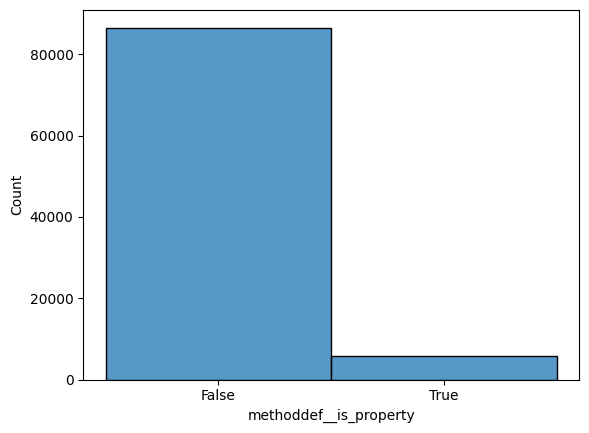

In [27]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_property'], discrete=True)

In [28]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_property'] == True])
num_false_values = len(X[X['methoddef__is_property'] == False])
std = X['methoddef__is_property'].std()
freq_true = len(X[X['methoddef__is_property'] == True]) / len(X['methoddef__is_property'])
freq_false = len(X[X['methoddef__is_property'] == False]) / len(X['methoddef__is_property'])
print(f'La variable is_property contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_property a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_property a False es {freq_false}.')

La variable is_property contiene 5765 valores verdaderos y 86559 valores falsos. Y, la desviación típica es de 0.24195995926856995
La frecuencia con la que programa puede tener la variable is_property a True es 0.06244313504614185.
La frecuencia con la que programa puede tener la variable is_property a False es 0.9375568649538581.


In [29]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_property', possible_values)

La variable methoddef__is_property contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_property toma el valor de 0.0 en un 93.76% de los items.
La variable methoddef__is_property toma el valor de 1.0 en un 6.244% de los items.


In [30]:
X[X['methoddef__is_property'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,5765.0,5765.0,5765.0,5765.000000,5765.0,5765.0,5765.0,5765.000000,5765.000000,5765.000000,...,5765.000000,5765.000000,5765.000000,5765.000000,5765.000000,5765.0,5765.000000,5765.000000,5765.000000,5765.000000
mean,0.0,0.0,0.0,0.021336,1.0,0.0,0.0,10.445967,0.000173,0.043365,...,0.288176,0.494709,0.505291,0.011969,0.047875,0.0,0.402082,0.000173,0.534605,0.003296
std,0.0,0.0,0.0,0.144513,0.0,0.0,0.0,5.321294,0.013170,0.203695,...,0.247401,0.500015,0.500015,0.108755,0.213520,0.0,0.490361,0.013170,0.498844,0.057319
min,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,10.000000,0.000000,0.000000,...,0.500000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,13.000000,0.000000,0.000000,...,0.500000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000
max,0.0,0.0,0.0,1.000000,1.0,0.0,0.0,45.000000,1.000000,1.000000,...,0.666667,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable is_wrapper (6/19)
Esta variable es booleana y representa si el método es wrapper.

<Axes: xlabel='methoddef__is_wrapper', ylabel='Count'>

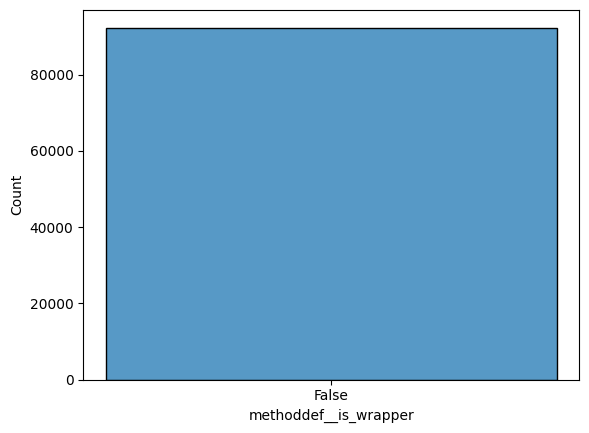

In [31]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_wrapper'], discrete=True)

In [32]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_wrapper'] == True])
num_false_values = len(X[X['methoddef__is_wrapper'] == False])
std = X['methoddef__is_wrapper'].std()
freq_true = len(X[X['methoddef__is_wrapper'] == True]) / len(X['methoddef__is_wrapper'])
freq_false = len(X[X['methoddef__is_wrapper'] == False]) / len(X['methoddef__is_wrapper'])
print(f'La variable is_wrapper contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_wrapper a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_wrapper a False es {freq_false}.')

La variable is_wrapper contiene 0 valores verdaderos y 92324 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_wrapper a True es 0.0.
La frecuencia con la que programa puede tener la variable is_wrapper a False es 1.0.


In [33]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_wrapper', possible_values)

La variable methoddef__is_wrapper contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_wrapper toma el valor de 0.0 en un 100.0% de los items.
La variable methoddef__is_wrapper toma el valor de True en un 0.0% de los items. [OUTLIER]


In [34]:
X[X['methoddef__is_wrapper'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna función que sea wrapper.

### Variable is_cached (7/19)
Esta variable es booleana y representa si el método es cached.

<Axes: xlabel='methoddef__is_cached', ylabel='Count'>

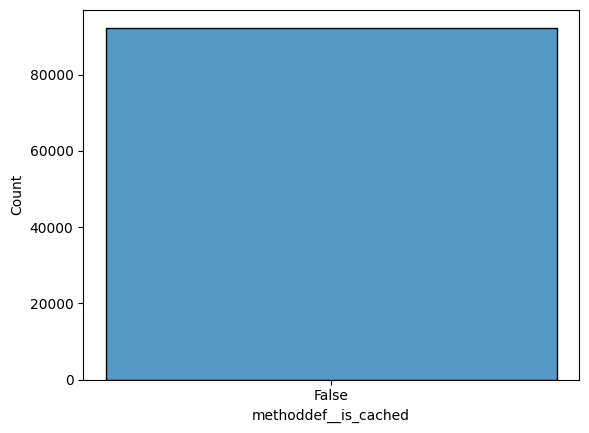

In [35]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_cached'], discrete=True)

In [36]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_cached'] == True])
num_false_values = len(X[X['methoddef__is_cached'] == False])
std = X['methoddef__is_cached'].std()
freq_true = len(X[X['methoddef__is_cached'] == True]) / len(X['methoddef__is_cached'])
freq_false = len(X[X['methoddef__is_cached'] == False]) / len(X['methoddef__is_cached'])
print(f'La variable is_cached contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_cached a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_cached a False es {freq_false}.')

La variable is_cached contiene 0 valores verdaderos y 92324 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_cached a True es 0.0.
La frecuencia con la que programa puede tener la variable is_cached a False es 1.0.


In [37]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_cached', possible_values)

La variable methoddef__is_cached contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_cached toma el valor de 0.0 en un 100.0% de los items.
La variable methoddef__is_cached toma el valor de True en un 0.0% de los items. [OUTLIER]


In [38]:
X[X['methoddef__is_cached'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna función que sea cached.

### Variable is_private (8/19)
Esta variable es de tipo booleano y representa si la función es privada.

<Axes: xlabel='functiondef__is_private', ylabel='Count'>

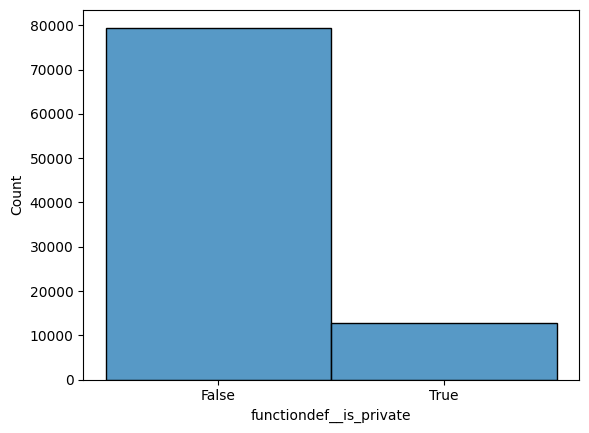

In [39]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_private'], discrete=True)

In [40]:
num_true_values = len(X[X['functiondef__is_private'] == True])
num_false_values = len(X[X['functiondef__is_private'] == False])
std = X['functiondef__is_private'].std()
freq_true = len(X[X['functiondef__is_private'] == True]) / len(X['functiondef__is_private'])
freq_false = len(X[X['functiondef__is_private'] == False]) / len(X['functiondef__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 12826 valores verdaderos y 79498 valores falsos. Y, la desviación típica es de 0.345868855714798
La frecuencia con la que programa puede tener la variable is_private a True es 0.13892379013041029.
La frecuencia con la que programa puede tener la variable is_private a False es 0.8610762098695897.


In [41]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_private', possible_values)

La variable functiondef__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_private toma el valor de 0.0 en un 86.11% de los items.
La variable functiondef__is_private toma el valor de 1.0 en un 13.89% de los items.


In [42]:
X[X['functiondef__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,12826.000000,12826.000000,12826.0,12826.000000,12826.000000,12826.0,12826.0,12826.000000,12826.0,12826.0,...,12826.000000,12826.000000,12826.000000,12826.0,12826.0,12826.0,12826.0,12826.000000,12826.000000,12826.0
mean,0.030173,0.054966,0.0,0.009200,0.019492,0.0,0.0,16.227974,0.0,1.0,...,0.326355,0.362311,0.637689,0.0,0.0,0.0,0.0,0.041478,0.958522,0.0
std,0.171070,0.227924,0.0,0.095478,0.138251,0.0,0.0,6.801476,0.0,0.0,...,0.342765,0.480687,0.480687,0.0,0.0,0.0,0.0,0.199401,0.199401,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,3.000000,0.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,12.000000,0.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,15.000000,0.0,1.0,...,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,20.000000,0.0,1.0,...,0.666667,1.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
max,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,54.000000,0.0,1.0,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0


### Variable is_magic (9/19)
Esta variable es de tipo booleano y representa si la función es de la forma __\w__.

<Axes: xlabel='functiondef__is_magic', ylabel='Count'>

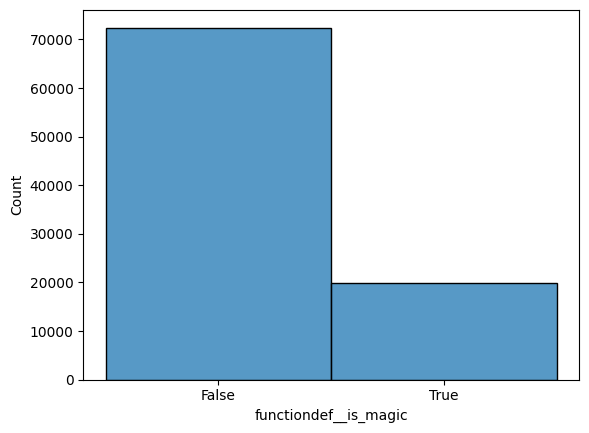

In [43]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_magic'], discrete=True)

In [44]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_magic'] == True])
num_false_values = len(X[X['functiondef__is_magic'] == False])
std = X['functiondef__is_magic'].std()
freq_true = len(X[X['functiondef__is_magic'] == True]) / len(X['functiondef__is_magic'])
freq_false = len(X[X['functiondef__is_magic'] == False]) / len(X['functiondef__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 19879 valores verdaderos y 72445 valores falsos. Y, la desviación típica es de 0.4110448658466339
La frecuencia con la que programa puede tener la variable is_magic a True es 0.2153177938564187.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.7846822061435813.


In [45]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_magic', possible_values)

La variable functiondef__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_magic toma el valor de 0.0 en un 78.47% de los items.
La variable functiondef__is_magic toma el valor de 1.0 en un 21.53% de los items.


In [46]:
X[X['functiondef__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,19879.000000,19879.000000,19879.000000,19879.000000,19879.000000,19879.0,19879.0,19879.000000,19879.0,19879.0,...,19879.000000,19879.000000,19879.000000,19879.0,19879.0,19879.0,19879.0,19879.0,19879.0,19879.0
mean,0.001258,0.000201,0.567534,0.001660,0.000050,0.0,0.0,8.072237,1.0,0.0,...,0.225905,0.479451,0.520549,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,0.035441,0.014184,0.495431,0.040711,0.007093,0.0,0.0,1.192345,0.0,0.0,...,0.327354,0.499590,0.499590,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,6.000000,1.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,1.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,8.000000,1.0,0.0,...,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,8.000000,1.0,0.0,...,0.500000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,28.000000,1.0,0.0,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Variable is_async (10/19)
Esta variable es booleana y representa si la función es asincrona.

<Axes: xlabel='functiondef__is_async', ylabel='Count'>

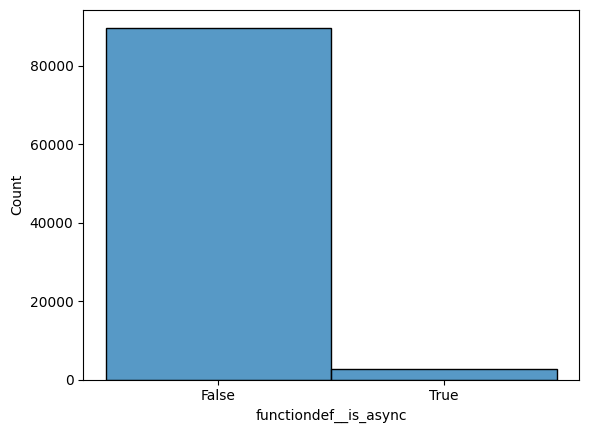

In [47]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_async'], discrete=True)

In [48]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_async'] == True])
num_false_values = len(X[X['functiondef__is_async'] == False])
std = X['functiondef__is_async'].std()
freq_true = len(X[X['functiondef__is_async'] == True]) / len(X['functiondef__is_async'])
freq_false = len(X[X['functiondef__is_async'] == False]) / len(X['functiondef__is_async'])
print(f'La variable is_async contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_async a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_async a False es {freq_false}.')

La variable is_async contiene 2659 valores verdaderos y 89665 valores falsos. Y, la desviación típica es de 0.16724702715873718
La frecuencia con la que programa puede tener la variable is_async a True es 0.028800745201681036.
La frecuencia con la que programa puede tener la variable is_async a False es 0.9711992547983189.


In [49]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_async', possible_values)

La variable functiondef__is_async contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_async toma el valor de 0.0 en un 97.12% de los items.
La variable functiondef__is_async toma el valor de 1.0 en un 2.88% de los items.


In [50]:
X[X['functiondef__is_async'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.0,2659.0,2659.000000,2659.000000,2659.000000,...,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.0,2659.000000,2659.0,2659.000000,2659.0
mean,0.004137,0.002256,0.004513,0.042121,0.000376,0.0,0.0,13.476871,0.084242,0.267394,...,0.518698,0.004513,0.995487,0.001128,0.007146,0.0,0.248214,0.0,0.743513,0.0
std,0.064198,0.047458,0.067040,0.200903,0.019393,0.0,0.0,8.088657,0.277803,0.442683,...,0.321400,0.067040,0.067040,0.033577,0.084245,0.0,0.432058,0.0,0.436776,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,12.000000,0.000000,0.000000,...,0.666667,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.000000,0.000000,1.000000,...,0.750000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,64.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0


### Variable has_return_type_annotation (11/19)
Esta variable es booleana y representa si la function tiene una anotacion del tipo de retorno.

<Axes: xlabel='functiondef__has_return_type_annotation', ylabel='Count'>

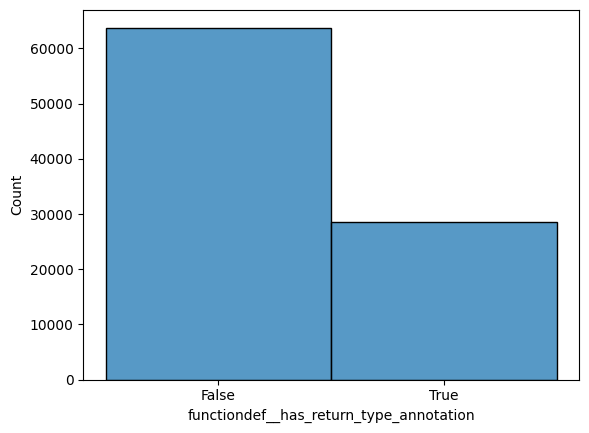

In [51]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_return_type_annotation'], discrete=True)

In [52]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_return_type_annotation'] == True])
num_false_values = len(X[X['functiondef__has_return_type_annotation'] == False])
std = X['functiondef__has_return_type_annotation'].std()
freq_true = len(X[X['functiondef__has_return_type_annotation'] == True]) / len(X['functiondef__has_return_type_annotation'])
freq_false = len(X[X['functiondef__has_return_type_annotation'] == False]) / len(X['functiondef__has_return_type_annotation'])
print(f'La variable has_return_type_annotation contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es {freq_false}.')

La variable has_return_type_annotation contiene 28538 valores verdaderos y 63786 valores falsos. Y, la desviación típica es de 0.4621278941631317
La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es 0.3091070577531303.
La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es 0.6908929422468697.


In [53]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_return_type_annotation', possible_values)

La variable functiondef__has_return_type_annotation contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_return_type_annotation toma el valor de 0.0 en un 69.09% de los items.
La variable functiondef__has_return_type_annotation toma el valor de 1.0 en un 30.91% de los items.


In [54]:
X[X['functiondef__has_return_type_annotation'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,28538.000000,28538.000000,28538.000000,28538.000000,28538.000000,28538.0,28538.0,28538.000000,28538.000000,28538.000000,...,28538.000000,28538.000000,28538.000000,28538.000000,28538.000000,28538.0,28538.000000,28538.000000,28538.000000,28538.0
mean,0.058238,0.018011,0.087497,0.026351,0.116336,0.0,0.0,12.552667,0.171736,0.205936,...,0.644298,0.251524,0.748476,0.008375,0.001647,0.0,0.192340,0.001156,0.796482,0.0
std,0.234197,0.132994,0.282568,0.160179,0.320633,0.0,0.0,6.795965,0.377157,0.404391,...,0.144226,0.433897,0.433897,0.091132,0.040550,0.0,0.394146,0.033986,0.402622,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.000000,0.000000,0.000000,...,0.666667,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,16.000000,0.000000,0.000000,...,0.750000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,64.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### Variable has_doc_string (12/19)
Esta variable es booleana y representa si la function comienza por un String plano a modo de comentario.

<Axes: xlabel='functiondef__has_doc_string', ylabel='Count'>

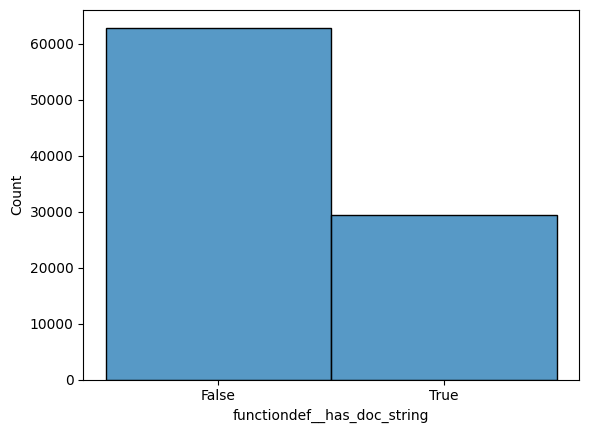

In [55]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_doc_string'], discrete=True)

In [56]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_doc_string'] == True])
num_false_values = len(X[X['functiondef__has_doc_string'] == False])
std = X['functiondef__has_doc_string'].std()
freq_true = len(X[X['functiondef__has_doc_string'] == True]) / len(X['functiondef__has_doc_string'])
freq_false = len(X[X['functiondef__has_doc_string'] == False]) / len(X['functiondef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 29442 valores verdaderos y 62882 valores falsos. Y, la desviación típica es de 0.46605220437049866
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.3188986612365149.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.6811013387634851.


In [57]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_doc_string', possible_values)

La variable functiondef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_doc_string toma el valor de 0.0 en un 68.11% de los items.
La variable functiondef__has_doc_string toma el valor de 1.0 en un 31.89% de los items.


In [58]:
X[X['functiondef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,29442.000000,29442.000000,29442.000000,29442.000000,29442.000000,29442.0,29442.0,29442.000000,29442.000000,29442.000000,...,29442.000000,29442.000000,29442.000000,29442.000000,29442.00000,29442.0,29442.000000,29442.000000,29442.000000,29442.000000
mean,0.042932,0.030127,0.069866,0.021975,0.080667,0.0,0.0,13.283574,0.109605,0.181068,...,0.320100,0.372257,0.627743,0.042388,0.00788,0.0,0.211874,0.004415,0.733306,0.000136
std,0.202707,0.170940,0.254926,0.146606,0.272328,0.0,0.0,7.690114,0.312402,0.385081,...,0.344640,0.483415,0.483415,0.201477,0.08842,0.0,0.408643,0.066303,0.442238,0.011655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,12.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.00000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.000000,0.000000,0.000000,...,0.666667,1.000000,1.000000,0.000000,0.00000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,66.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable number_of_characters (13/19)
Esta variable representa el número de caracteres que tiene el nombre de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 74. Con una media de 12.40.

<Axes: ylabel='functiondef__number_of_characters'>

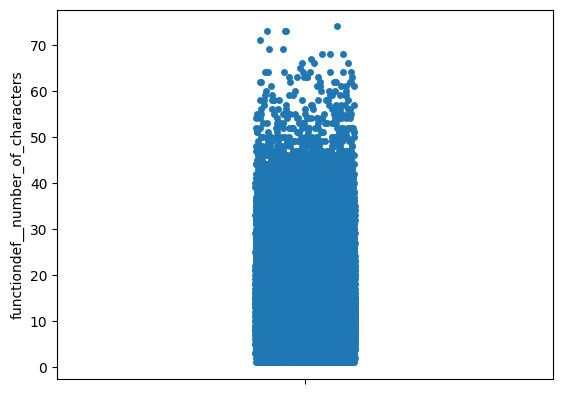

In [59]:
sns.stripplot(X['functiondef__number_of_characters'])

In [60]:
print_outliers_for_df_column(X, 'functiondef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6569739139243348
Rango valores atípicos extremos (Tukey): [-16.0,40.0]
Rango valores atípicos leves (Tukey): [-4.0,28.0]
Rango valores atípicos extremos (Fixed BoxPlot): [6.796182266786332,182.13526492370048]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -16.0 (Q1-3*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -4.0 (Q1-1.5*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 3625 instancias tienen un valor para functiondef__number_of_characters superior a 28.0 (Q3+1.5*IQR) para functiondef__number_of_characters. Representando un 3.926% del total de instancias.
+3.0IQR: 764 instancias tienen un valor para functiondef__number_of_characters superior a 40.0 (Q3-3*IQR) para functiondef__number_of_characters. Re

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 40.0 (Con un MC de 65 usamos Tuckey Extremo)

In [61]:
X[X['functiondef__number_of_characters'] > 40].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,764.000000,764.000000,764.0,764.000000,764.000000,764.0,764.0,764.000000,764.0,764.000000,...,764.000000,764.000000,764.000000,764.000000,764.0,764.0,764.0,764.000000,764.00000,764.0
mean,0.001309,0.031414,0.0,0.003927,0.006545,0.0,0.0,47.493454,0.0,0.053665,...,0.105117,0.007853,0.992147,0.040576,0.0,0.0,0.0,0.031414,0.92801,0.0
std,0.036179,0.174547,0.0,0.062581,0.080686,0.0,0.0,6.373784,0.0,0.225503,...,0.261582,0.088329,0.088329,0.197435,0.0,0.0,0.0,0.174547,0.25864,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,41.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,43.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.00000,0.0
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,45.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.00000,0.0
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,50.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.00000,0.0
max,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,74.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.00000,0.0


### Variable body_count (14/19)
Esta variable representa el número de sentencias en el root de la función. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 364. Con una media de 3,74.

<Axes: ylabel='functiondef__body_count'>

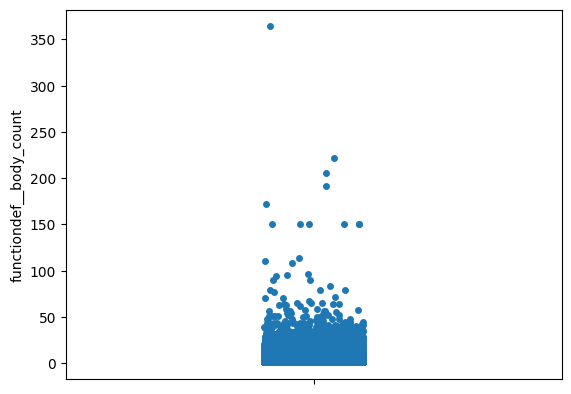

In [62]:
sns.stripplot(X['functiondef__body_count'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [63]:
print_outliers_for_df_column(X, 'functiondef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6184199023897181
Rango valores atípicos extremos (Tukey): [-11.0,17.0]
Rango valores atípicos leves (Tukey): [-5.0,11.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.31113515556647187,76.19617384108172]
-3.0IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -11.0 (Q1-3*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -5.0 (Q1-1.5*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 3849 instancias tienen un valor para functiondef__body_count superior a 11.0 (Q3+1.5*IQR) para functiondef__body_count. Representando un 4.169% del total de instancias.
+3.0IQR: 1404 instancias tienen un valor para functiondef__body_count superior a 17.0 (Q3-3*IQR) para functiondef__body_count. Representando un 1.521% del total de instancias.
L: 0 instancias tienen un valor

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 76.1 (Con un MC de 0.61 usamos U)

In [64]:
X[X['functiondef__body_count'] > 76.1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,24.0,24.0,24.000000,24.0,24.0,24.0,24.0,24.000000,24.000000,24.000000,...,24.0,24.000000,24.000000,24.000000,24.0,24.0,24.0,24.000000,24.000000,24.0
mean,0.0,0.0,0.375000,0.0,0.0,0.0,0.0,10.041667,0.375000,0.041667,...,0.0,0.250000,0.750000,0.041667,0.0,0.0,0.0,0.041667,0.916667,0.0
std,0.0,0.0,0.494535,0.0,0.0,0.0,0.0,4.947368,0.494535,0.204124,...,0.0,0.442326,0.442326,0.204124,0.0,0.0,0.0,0.204124,0.282330,0.0
min,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,6.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,7.500000,0.000000,0.000000,...,0.0,0.000000,0.750000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0
50%,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,8.000000,0.000000,0.000000,...,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0
75%,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,10.250000,1.000000,0.000000,...,0.0,0.250000,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0
max,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,23.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0


### Variable number_of_decorators (15/19)
Esta variable representa el número de decoradores de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 7. Con una media de 0.19.

<Axes: ylabel='functiondef__number_of_decorators'>

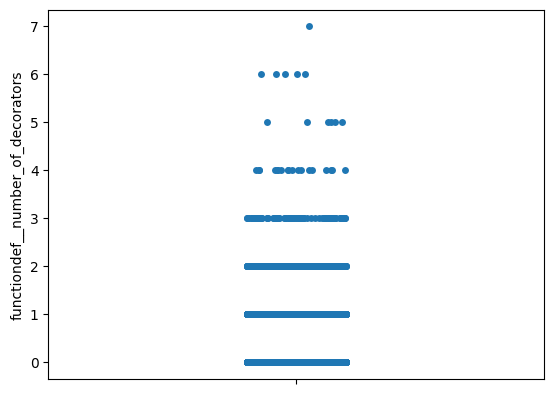

In [65]:
sns.stripplot(X['functiondef__number_of_decorators'])

In [66]:
print_outliers_for_df_column(X, 'functiondef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7592692955549908
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 16967 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para functiondef__number_of_decorators. Representando un 18.38% del total de instancias.
+3.0IQR: 16967 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3-3*IQR) para functiondef__number_of_decorators. Representando un 18.38% del total de i

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [67]:
X[X['functiondef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,16967.000000,16967.000000,16967.000000,16967.000000,16967.000000,16967.0,16967.0,16967.000000,16967.000000,16967.000000,...,16967.000000,16967.000000,16967.000000,16967.000000,16967.000000,16967.000000,16967.000000,16967.000000,16967.000000,16967.000000
mean,0.171922,0.110037,0.002475,0.049390,0.339777,0.0,0.0,13.561502,0.016797,0.116992,...,0.338020,0.301880,0.698120,0.036600,0.017446,0.000059,0.249484,0.004185,0.679790,0.012436
std,0.377324,0.312945,0.049693,0.216687,0.473647,0.0,0.0,8.067007,0.128515,0.321420,...,0.330004,0.459087,0.459087,0.187784,0.130929,0.007677,0.432727,0.064555,0.466571,0.110824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,12.000000,0.000000,0.000000,...,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,17.000000,0.000000,0.000000,...,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,74.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable height (16/19)
Esta variable representa la distancia desde la función hasta el root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 7. Con una media de 2.08.

<Axes: ylabel='functiondef__height'>

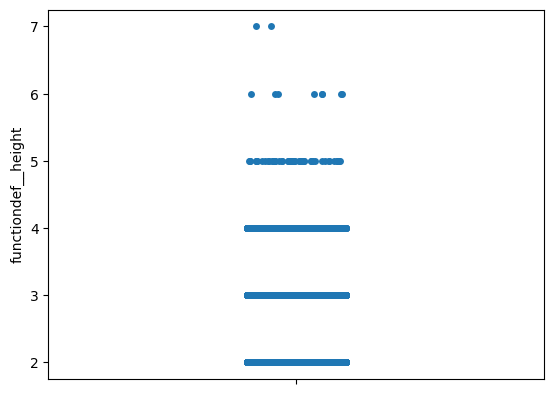

In [68]:
sns.stripplot(X['functiondef__height'])

In [69]:
print_outliers_for_df_column(X, 'functiondef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [2.0,2.0]
Rango valores atípicos leves (Tukey): [2.0,2.0]
Rango valores atípicos extremos (Fixed BoxPlot): [2.0,2.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__height inferior a 2.0 (Q1-3*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__height inferior a 2.0 (Q1-1.5*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 6113 instancias tienen un valor para functiondef__height superior a 2.0 (Q3+1.5*IQR) para functiondef__height. Representando un 6.621% del total de instancias.
+3.0IQR: 6113 instancias tienen un valor para functiondef__height superior a 2.0 (Q3-3*IQR) para functiondef__height. Representando un 6.621% del total de instancias.
L: 0 instancias tienen un valor para functiondef__height inferior a 2.0 para functiondef__height. Representando un 0.0

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 2 (Todos los umbrales son 2)

In [70]:
X[X['functiondef__height'] > 2].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,6113.000000,6113.000000,6113.000000,6113.0,6113.000000,6113.0,6113.0,6113.000000,6113.000000,6113.000000,...,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.0,6113.000000,6113.000000,6113.000000,6113.000000
mean,0.011942,0.006216,0.164731,0.0,0.005562,0.0,0.0,10.290201,0.281531,0.040569,...,0.042072,0.468183,0.531817,0.297072,0.001145,0.0,0.221004,0.023393,0.457059,0.000327
std,0.108633,0.078604,0.370968,0.0,0.074377,0.0,0.0,5.114609,0.449783,0.197306,...,0.151999,0.499027,0.499027,0.457006,0.033823,0.0,0.414957,0.151160,0.498193,0.018086
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,9.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,13.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,46.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable expressions_pct (17/19)
Esta variable representa la proporción de las sentencias en el root de la funcsion que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.22.

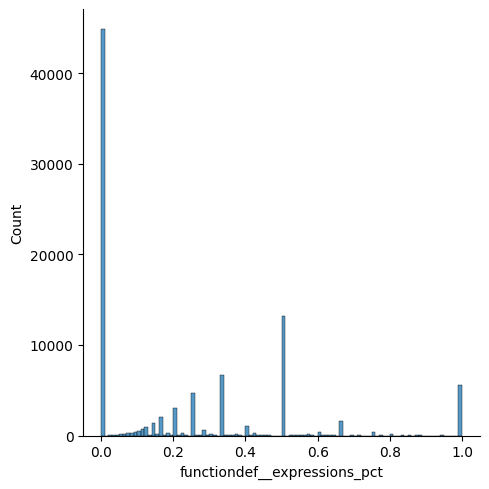

In [71]:
sns.displot(X['functiondef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [72]:
print_outliers_for_df_column(X, 'functiondef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.49172595143318176
Rango valores atípicos extremos (Tukey): [-1.2000000178813934,1.600000023841858]
Rango valores atípicos leves (Tukey): [-0.6000000089406967,1.0000000149011612]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.10732792206921338,4.6891054794852245]
-3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -1.2000000178813934 (Q1-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -0.6000000089406967 (Q1-1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct superior a 1.0000000149011612 (Q3+1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct superior

In [73]:
X[X['functiondef__expressions_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,47486.000000,47486.000000,47486.000000,47486.000000,47486.000000,47486.0,47486.0,47486.000000,47486.000000,47486.000000,...,47486.000000,47486.000000,47486.000000,47486.00000,47486.000000,47486.000000,47486.00000,47486.000000,47486.000000,47486.000000
mean,0.034579,0.021817,0.151582,0.014783,0.051405,0.0,0.0,12.987701,0.191509,0.139536,...,0.258355,0.360527,0.639473,0.07836,0.005581,0.000021,0.18595,0.006254,0.723224,0.000611
std,0.182712,0.146087,0.358619,0.120686,0.220824,0.0,0.0,7.892532,0.393493,0.346509,...,0.334822,0.480159,0.480159,0.26874,0.074495,0.004589,0.38907,0.078838,0.447410,0.024705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.000000,0.000000,0.000000,...,0.666667,1.000000,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,73.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### Importante
El 49% de los metodos no tienen expresiones.

### Variable type_annotations_pct (18/19)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo en la función (incluyendo el return). Este campo toma valores del 0.0 - 1.0. Su media es 0.22.

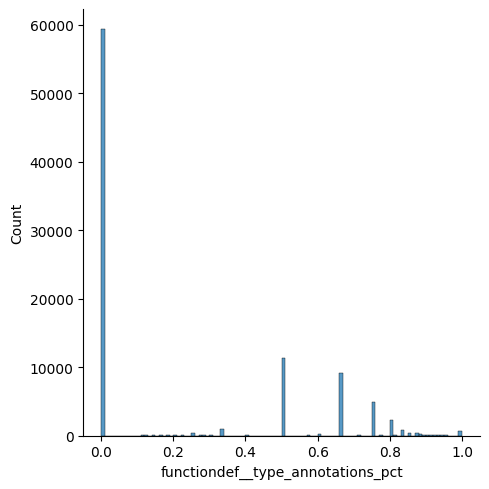

In [74]:
sns.displot(X['functiondef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [75]:
print_outliers_for_df_column(X, 'functiondef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.456480011343956
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.15177409023454128,5.156378373549865]
-3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -1.5 (Q1-3*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -0.75 (Q1-1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct superior a 1.25 (Q3+1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct superior a 2.0 (Q3-3*IQR) para functiondef__type_annotations_pct. Representa

In [76]:
X[X['functiondef__type_annotations_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,33019.000000,33019.000000,33019.000000,33019.000000,33019.000000,33019.0,33019.0,33019.000000,33019.000000,33019.000000,...,33019.000000,33019.000000,33019.000000,33019.000000,33019.000000,33019.0,33019.000000,33019.000000,33019.000000,33019.0
mean,0.052031,0.018474,0.130137,0.023290,0.100548,0.0,0.0,12.425785,0.207032,0.191859,...,0.632806,0.218935,0.781065,0.007390,0.001605,0.0,0.185651,0.001060,0.804295,0.0
std,0.222092,0.134661,0.336459,0.150824,0.300734,0.0,0.0,6.833559,0.405185,0.393769,...,0.155254,0.413530,0.413530,0.085646,0.040033,0.0,0.388830,0.032541,0.396749,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.033333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.500000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,10.000000,0.000000,0.000000,...,0.666667,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,16.000000,0.000000,0.000000,...,0.750000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,64.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### Importante
El 65% de los metodos no tienen anotaciones de tipo.

### Variable name_convention (19/19)
Esta variable es de tipo categórica y representa la name_convention del nombre del método.

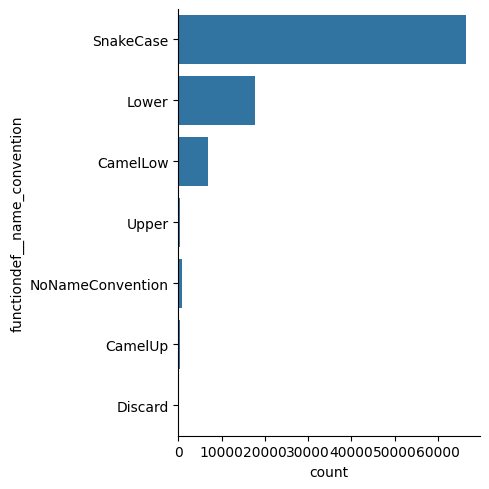

In [77]:
sns.catplot(full_table['functiondef__name_convention'], kind="count")

In [78]:
print_frequency_anal_for_cat_var(full_table, 'functiondef__name_convention')

La variable functiondef__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable functiondef__name_convention toma el valor de SnakeCase en un 71.93% de los items.
La variable functiondef__name_convention toma el valor de Lower en un 19.09% de los items.
La variable functiondef__name_convention toma el valor de CamelLow en un 7.441% de los items.
La variable functiondef__name_convention toma el valor de NoNameConvention en un 0.8199% de los items.
La variable functiondef__name_convention toma el valor de CamelUp en un 0.4452% de los items.
La variable functiondef__name_convention toma el valor de Upper en un 0.2719% de los items.
La variable functiondef__name_convention toma el valor de Discard en un 0.001083% de los items. [OUTLIER]


### IMPORTANTE
Dicard es outlier

## Multivariate

TODO: isolation forest algorithm

In [79]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,methoddef__expertise_level,functiondef__name_convention,functiondef__number_of_characters,functiondef__is_private,functiondef__is_magic,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct
3929,False,False,False,True,True,False,False,BEGINNER,SnakeCase,14,False,False,1,1.0,False,2,True,True,2,0.5
3939,False,False,False,True,True,False,False,BEGINNER,SnakeCase,15,False,False,1,1.0,False,2,True,True,2,0.5
4155,False,False,False,True,True,False,False,BEGINNER,SnakeCase,16,False,False,1,1.0,False,2,True,True,2,0.5
4156,False,False,False,True,True,False,False,BEGINNER,SnakeCase,18,False,False,1,1.0,False,2,True,True,2,0.5
4157,False,False,False,True,True,False,False,BEGINNER,SnakeCase,15,False,False,1,1.0,False,2,True,True,2,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84484,False,True,False,False,False,False,False,EXPERT,Lower,3,False,False,5,0.6,False,1,False,False,4,1.0
89114,False,False,False,True,True,False,False,EXPERT,SnakeCase,13,True,False,1,1.0,False,2,True,False,2,0.5
89118,False,False,False,True,True,False,False,EXPERT,Lower,5,False,False,2,1.0,False,2,True,True,2,0.5
89499,False,True,False,False,False,False,False,EXPERT,Lower,13,False,False,1,1.0,False,1,False,True,4,0.0


### IMPORTANTE
Hay que analizar los 111 los outliers de la tabla.